In [1]:
from sklearn import datasets
import numpy as np

## Loading the data and separating x and y

In [2]:
dataset = datasets.load_digits()
dataset

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [3]:
x = dataset['data']
y = dataset['target']

## Viewing the image

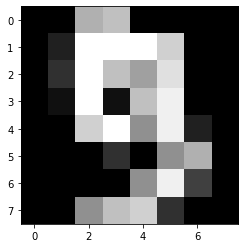

In [4]:
import matplotlib.pyplot as plt
a = x[9].reshape(8,8)
plt.imshow(a,cmap='gray')

## Splitting into train and test sets

In [5]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size = 0.33, random_state=42)

In [6]:
train_x.shape

(1203, 64)

## Modelling the data

In [26]:
from sklearn import linear_model
model = linear_model.LogisticRegression()
model.fit(train_x, train_y)

c:\users\santo\pycharmprojects\webscraping\venv\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
model.score(test_x,test_y)

0.9629629629629629

## Testing the value

In [9]:
model.predict(test_x)[-3]

4

In [10]:
test_y[-3]

4

## Representing in confusion matrix

In [11]:
y_pred = model.predict(test_x)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y, y_pred)
cm

array([[55,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 49,  1,  0,  1,  0,  0,  1,  2,  1],
       [ 0,  0, 52,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 54,  0,  1,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 62,  0,  1,  0,  0,  0],
       [ 0,  1,  0,  0,  0, 69,  1,  1,  0,  1],
       [ 0,  0,  0,  0,  0,  1, 56,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0, 60,  0,  1],
       [ 0,  1,  0,  0,  0,  1,  0,  0, 50,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  2, 65]], dtype=int64)

Text(114.0, 0.5, 'Predicted values')

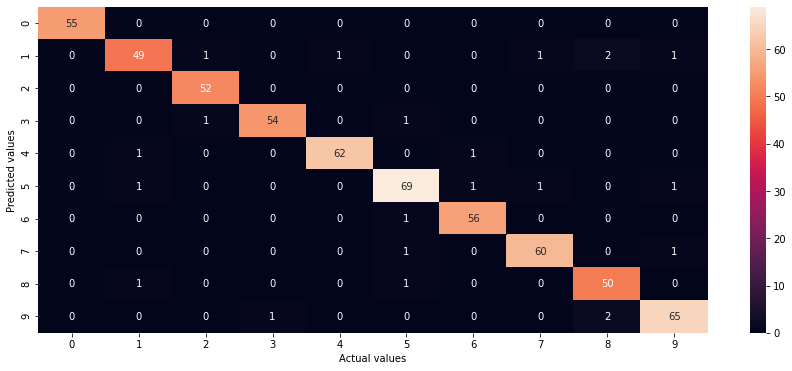

In [15]:
import seaborn as sns
plt.figure(figsize=(15,6))
sns.heatmap(cm, annot=True)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")